# Notebook 03: Fundamentos de k-means

En este notebook se va a implementar el algoritmo de clustering K-Means. En la primera parte se explica la implementación manual del algoritmo y luego se muestra como realizar los cálculos de forma sencilla con la librería sklearn.

In [1]:
import numpy as np
import tensorflow as tf # Solamente lo utilizamos para descargar los datos
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
d1 = np.random.randn(20, 2) + 2
d2 = np.random.randn(20, 2) - 3
d3 = np.random.randn(20, 2)
d3[:, 0] = d3[:, 0] + 4
d3[:, 1] = d3[:, 1] - 4

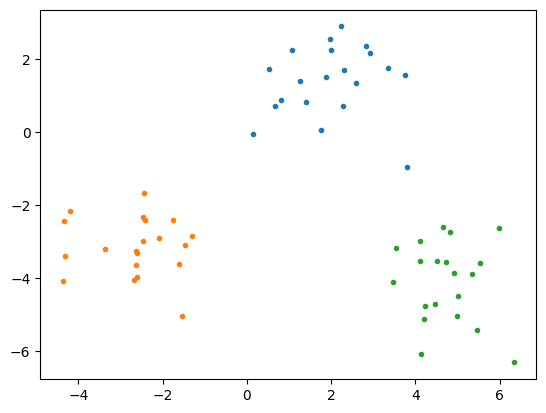

In [3]:
plt.plot(d1[:, 0], d1[:, 1], '.')
plt.plot(d2[:, 0], d2[:, 1], '.')
plt.plot(d3[:, 0], d3[:, 1], '.')
plt.show()

In [4]:
datos = np.concatenate((d1, d2, d3), axis=0)
datos = datos[np.random.permutation(len(datos))]

## Implementación manual del algoritmo

In [5]:
K = 3

In [6]:
# Inicializar los centroides
# Se seleccionan puntos aleatorios del conjunto de datos
i_centroides = np.random.choice(len(datos), K, replace=False) # NO cogemos puntos repetidos
centroides = datos[i_centroides]
centroides_old = np.zeros_like(centroides)

# While no se cumpla la condicion de parada do
# Condicion de parada: Que en una iteración del algoritmo no se modifique ningún centroide
while not (centroides == centroides_old).all():
    centroides_old = centroides

    # Asignar cada dato xi al centroide más cercano
    matriz_distancias = euclidean_distances(datos, centroides) # (D, K)
    clusters = np.argmin(matriz_distancias, axis=1) # (D)

    # Actualizar los centroides según cierta operación
    # Operación: Actualizar el centroide por el promedio de los puntos del cluster
    centroides = np.zeros_like(centroides)
    for c in range(K):
      centroides[c] = datos[clusters == c].mean(axis=0)

In [7]:
clusters

array([2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 1,
       2, 1, 1, 2, 0, 2, 2, 2, 2, 1, 0, 2, 0, 1, 1, 1, 2, 0, 1, 0, 0, 0,
       0, 1, 0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 2])

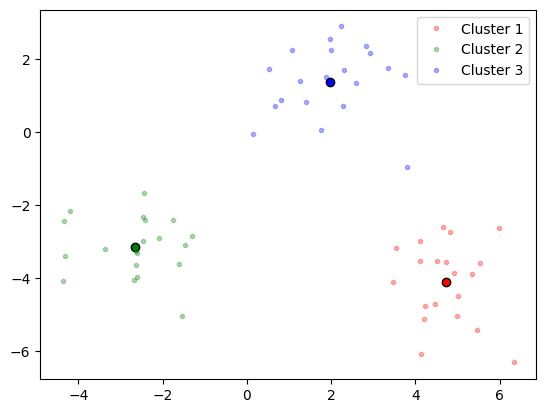

In [8]:
color = ["red", "green", "blue"]
for c in np.unique(clusters):
  plt.plot(datos[clusters == c, 0], datos[clusters == c, 1], '.', color=color[c], label="Cluster "+str(c+1), alpha=0.3)
  plt.scatter([centroides[c, 0]], [centroides[c, 1]], color=color[c], edgecolors="black")
plt.legend()
plt.show()

## K-Means usando la librería Sklearn

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [9]:
from sklearn.cluster import KMeans

In [10]:
K = 3

kmeans = KMeans(n_clusters = K, init = 'random', n_init = 10).fit(datos)

In [11]:
clusters = kmeans.predict(datos)
clusters

array([1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0, 0, 0, 2, 2,
       1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 0, 1, 0, 2, 2, 2, 1, 0, 2, 0, 0, 0,
       0, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1], dtype=int32)

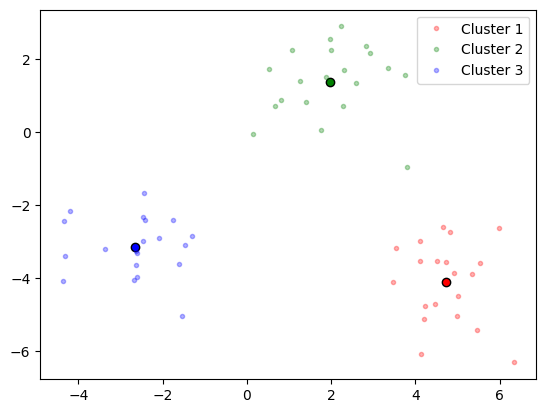

In [12]:
color = ["red", "green", "blue"]
for c in np.unique(clusters):
  plt.plot(datos[clusters == c, 0], datos[clusters == c, 1], '.', color=color[c], label="Cluster "+str(c+1), alpha=0.3)
  plt.scatter([kmeans.cluster_centers_[c, 0]], [kmeans.cluster_centers_[c, 1]], color=color[c], edgecolors="black")
plt.legend()
plt.show()

### Frontera de clusterización con K-Means

In [13]:
margen = 0.5
XX, YY = np.meshgrid(np.linspace(datos.min(axis=0)[0] - margen, datos.max(axis=0)[0] + margen, 100), np.linspace(datos.min(axis=0)[1] - margen, datos.max(axis=0)[1] + margen, 100))
points = np.concatenate([XX.reshape(-1, 1), YY.reshape(-1, 1)], axis=1)
labels = kmeans.predict(points)
labels = labels.reshape(XX.shape)

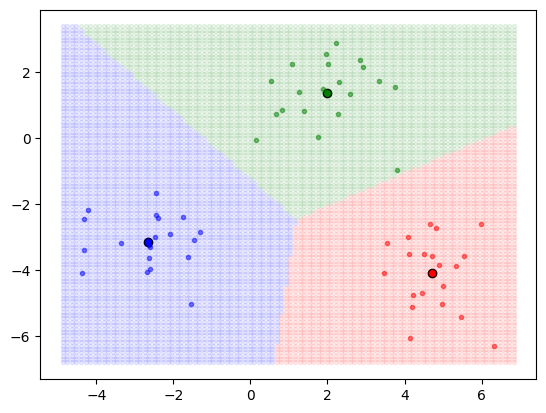

In [14]:
color = ["red", "green", "blue"]
for c in np.unique(clusters):
  plt.plot(datos[clusters == c, 0], datos[clusters == c, 1], '.', color=color[c], label="Cluster "+str(c+1), alpha=0.5)
  plt.scatter([kmeans.cluster_centers_[c, 0]], [kmeans.cluster_centers_[c, 1]], color=color[c], edgecolors="black")
  plt.scatter(XX[labels == c], YY[labels == c], color=color[c], marker='.', alpha=0.08)
plt.show()

# K-Means para MNIST

Vamos a descargar el dataset de MNIST para hacer clustering con los datos de MNIST:

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Dividimos entre 255 para que todos los atributos de la imagen estén entre 0 y 1.

In [16]:
x_train = x_train / 255
x_test = x_test / 255

Restamos ahora la media para destacar como positivos los píxeles de la clase y el resto con valores negativos.

In [17]:
x_train = x_train - x_train.mean(axis=0)
x_test = x_test - x_train.mean(axis=0)

Veamos el aspecto de nuestros datos una vez más:

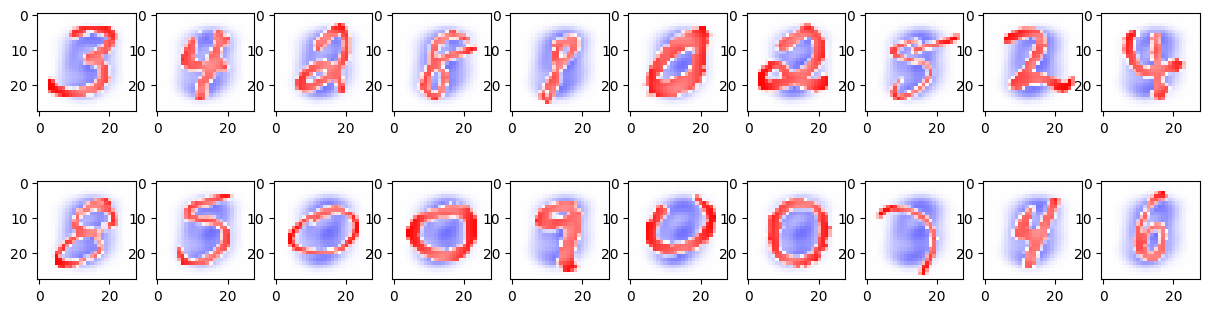

In [18]:
plt.figure(figsize=(15,4))
for i in range(20):
  plt.subplot(2,10,i+1)
  plt.imshow(x_train[np.random.randint(60000)], cmap="bwr", vmin=-1, vmax=1)
plt.show()

In [19]:
datos = x_train.reshape(x_train.shape[0], -1)
datos.shape

(60000, 784)

Para agilizar los cálculos (60000 imágenes tarda un buen rato) vamos a reducir el número de imágenes a 10000.

In [20]:
datos = datos[:10000]
datos.shape

(10000, 784)

Empezamos con el algoritmo. Recuerda definir $K$.

- Probamos con K = 10, el número de clases

In [21]:
K = 10

kmeans = KMeans(n_clusters = K, init = 'random', n_init = 10).fit(datos)
clusters = kmeans.predict(datos)
clusters

array([0, 9, 7, ..., 2, 1, 6], dtype=int32)

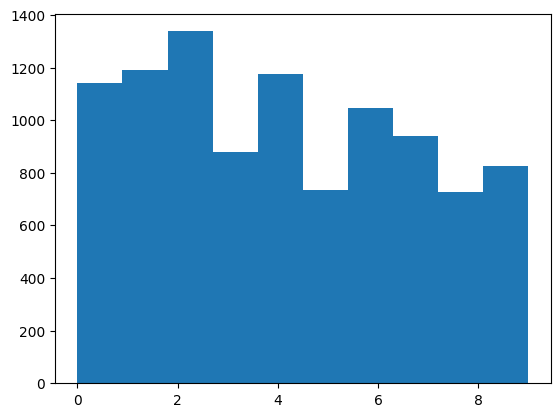

In [22]:
plt.hist(clusters, bins=K)
plt.show()

<ipython-input-23-c4d8c9be98b7>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,10,i+1)


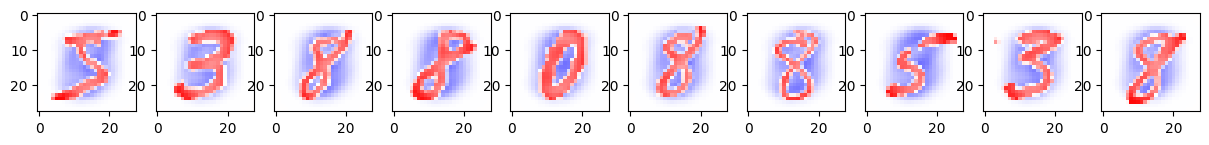

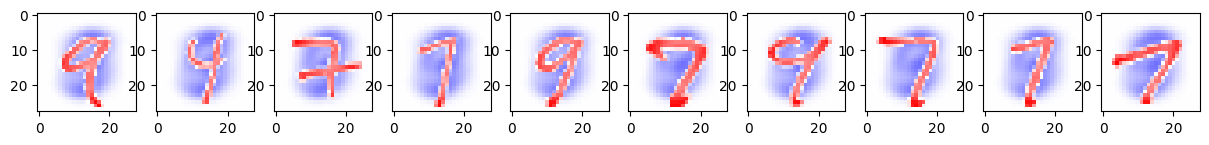

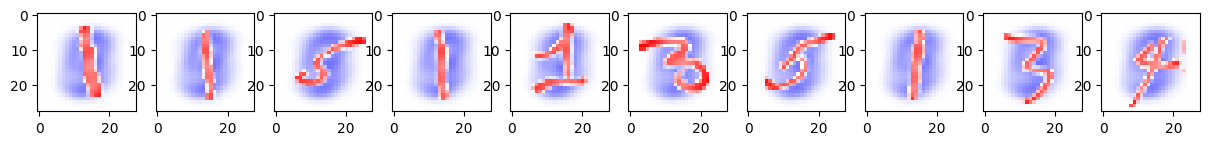

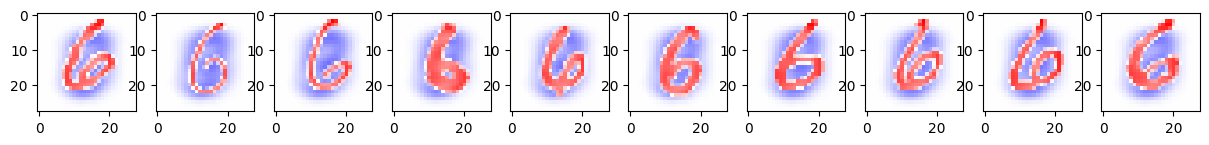

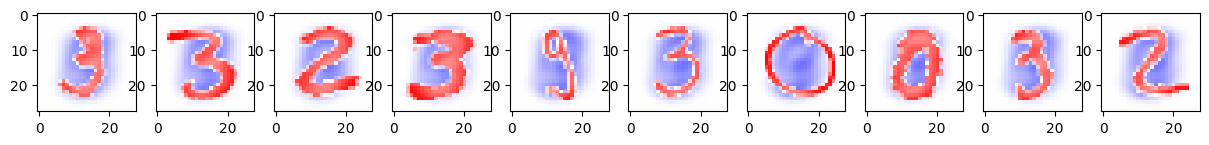

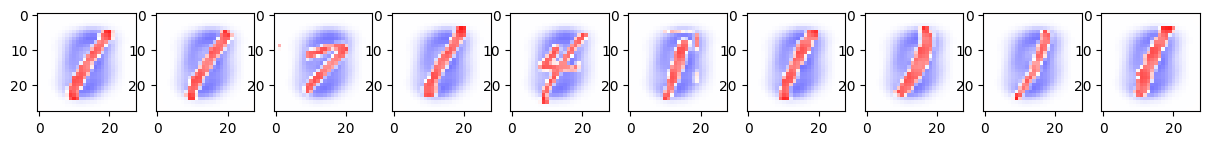

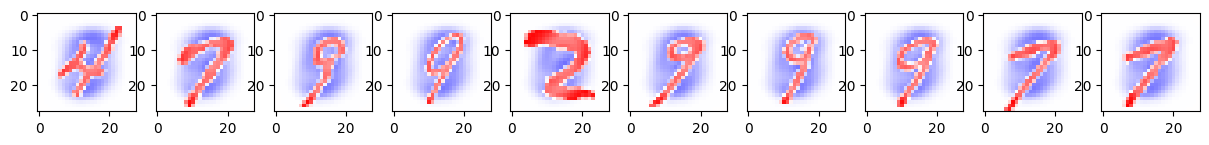

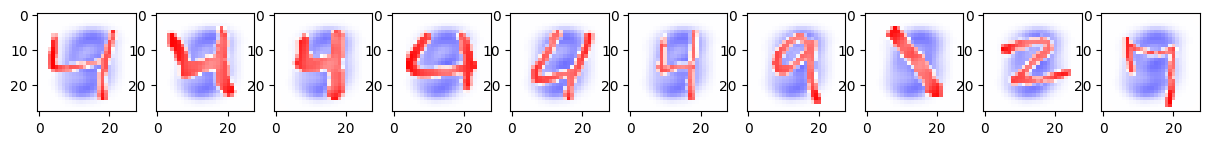

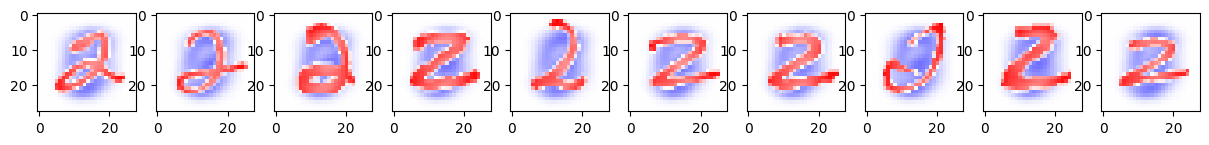

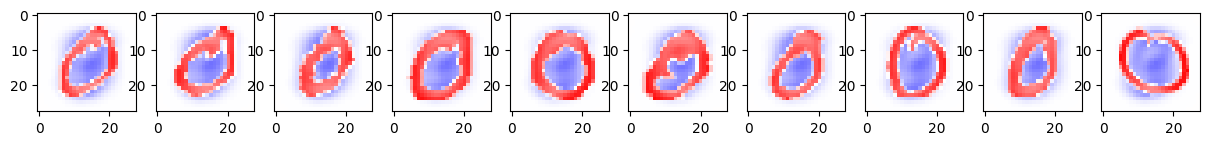

In [23]:
for c in np.unique(clusters):
  indices = np.where(clusters == c)[0]
  plt.figure(figsize=(15,4))
  plt.title("Cluster " + str(c))
  for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[indices][i], cmap="bwr", vmin=-1, vmax=1)
  plt.show()

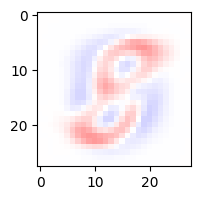

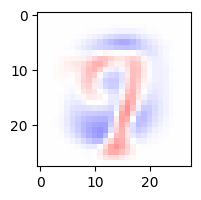

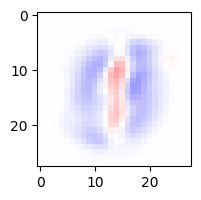

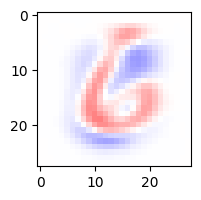

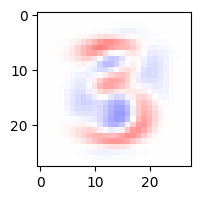

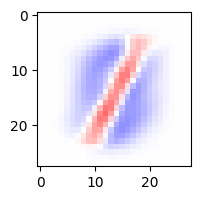

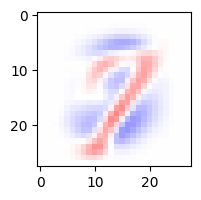

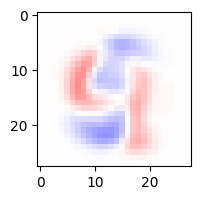

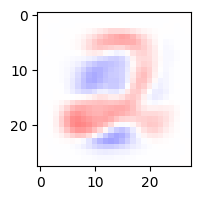

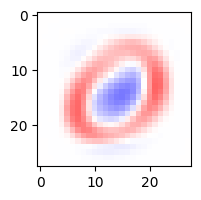

In [24]:
for center in kmeans.cluster_centers_:
  plt.figure(figsize=(2,2))
  plt.imshow(center.reshape(28,28), cmap="bwr", vmin=-1, vmax=1)
  plt.show()

**Discusión de los resultados**

No tiene sentido seleccionar un $K$ igual al número de clases. Estamos en clustering, no en aprendizaje supervisado!

**Ejercicio**: Busca un K razonable y cuéntanos qué conclusiones sacas.

In [25]:
K = 30

kmeans = KMeans(n_clusters = K, init = 'random', n_init = 10).fit(datos)
clusters = kmeans.predict(datos)
clusters

array([12, 17,  7, ..., 26,  2,  9], dtype=int32)

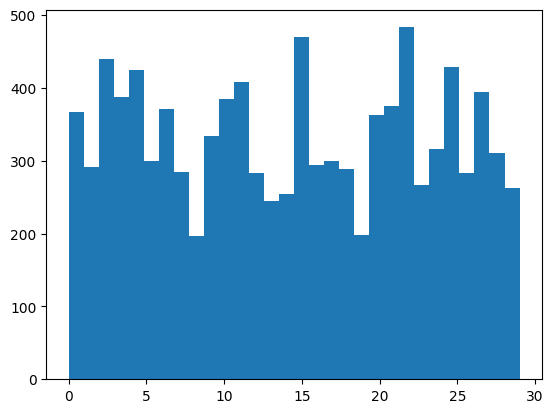

In [26]:
plt.hist(clusters, bins=K)
plt.show()

<ipython-input-27-d3f7e31f020e>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,10,i+1)


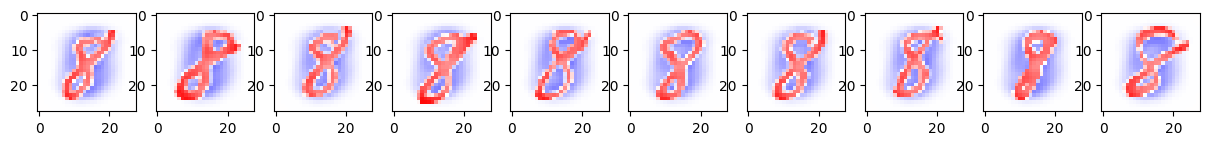

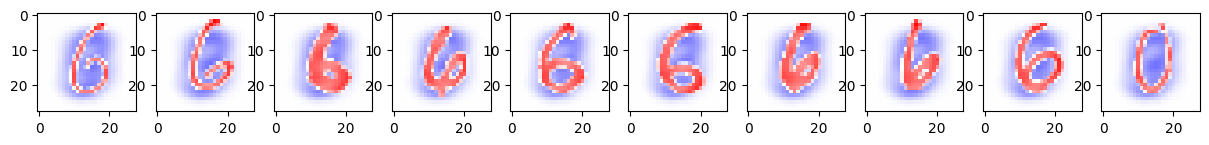

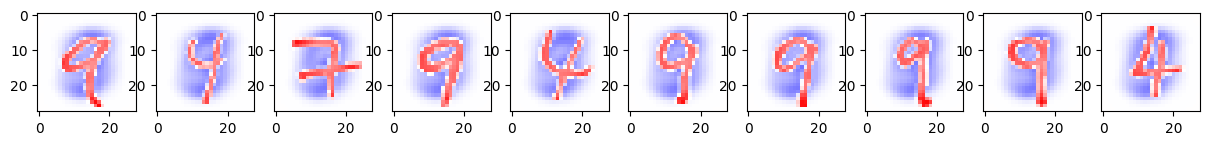

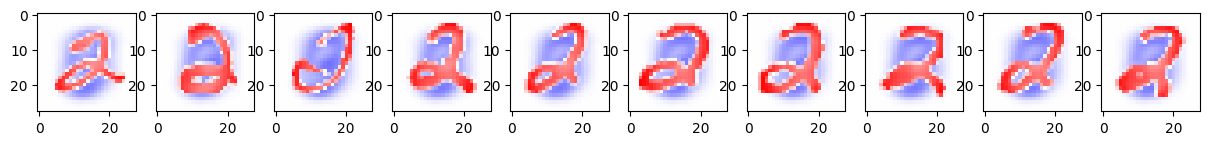

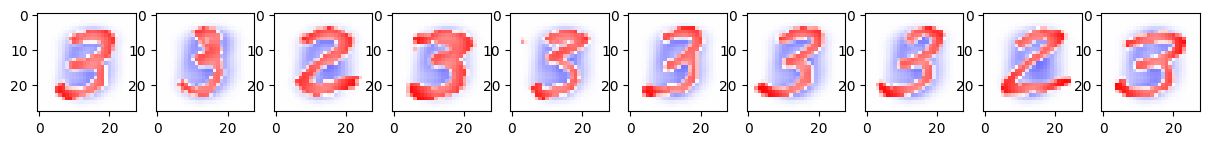

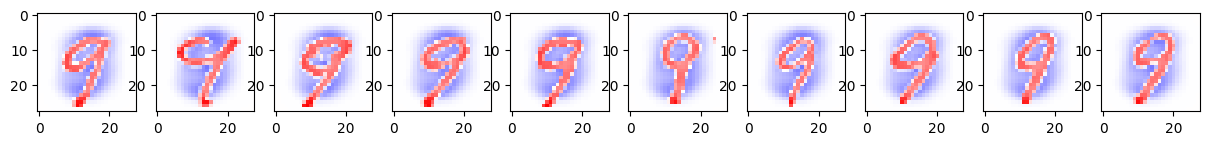

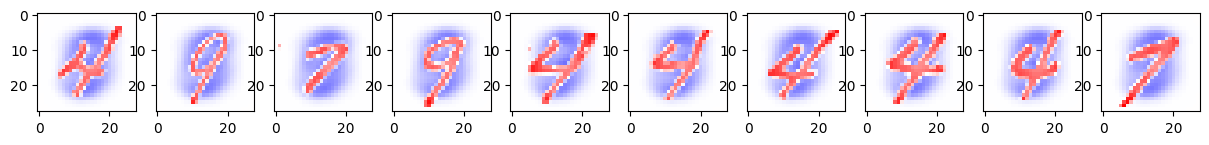

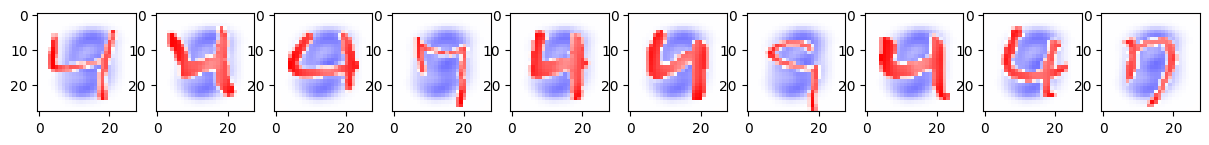

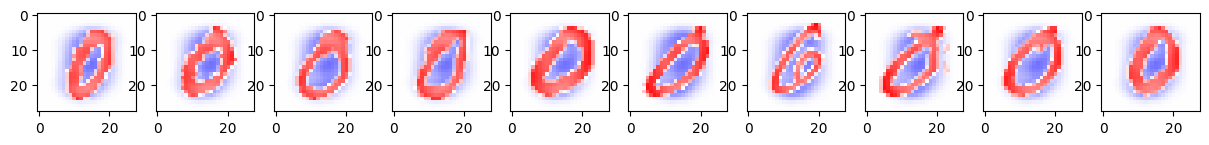

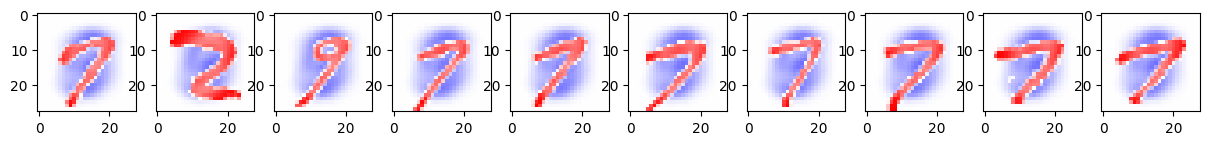

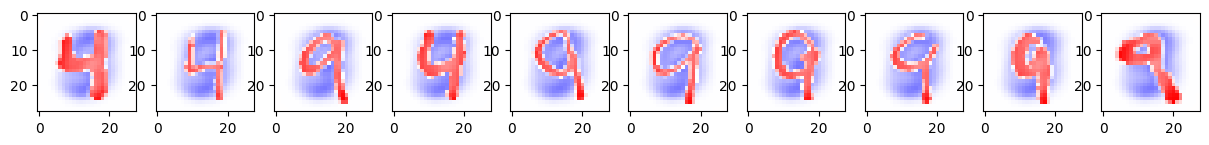

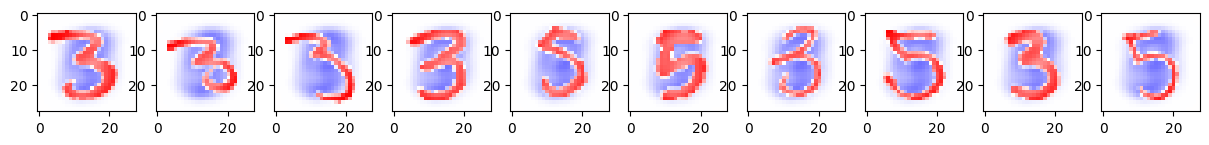

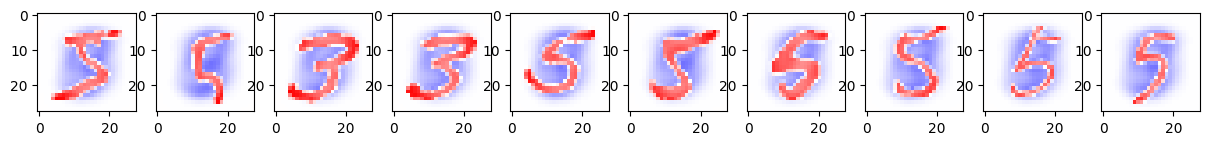

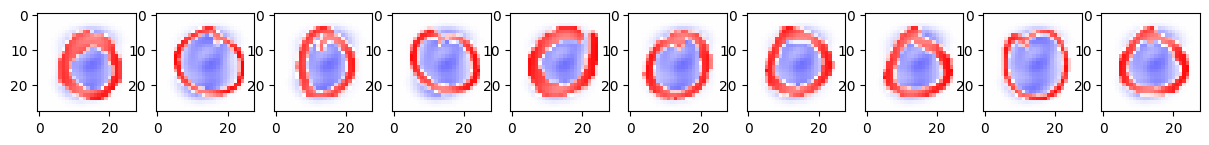

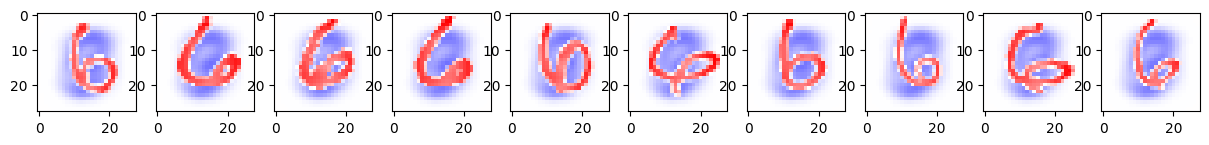

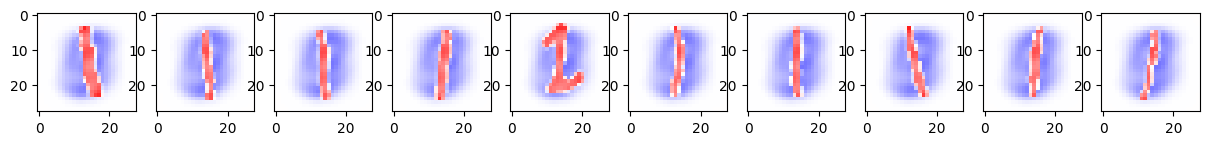

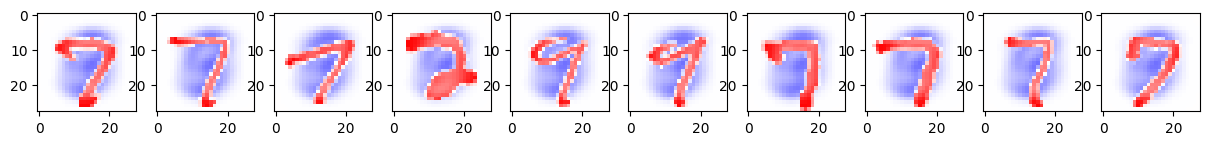

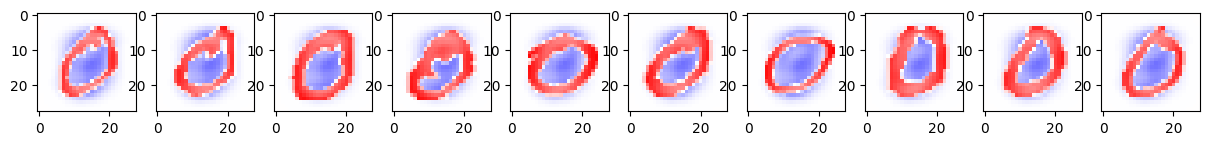

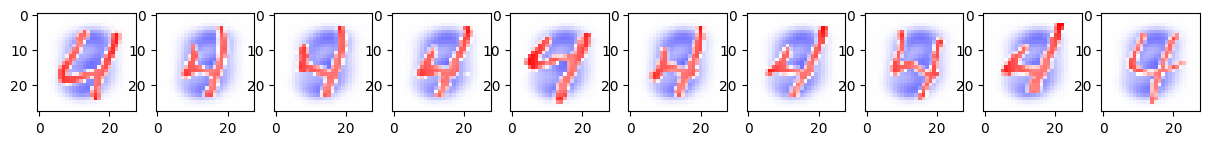

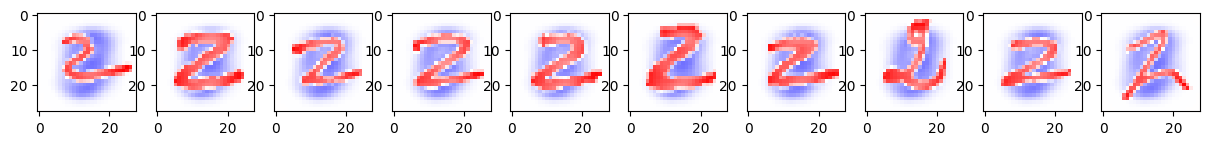

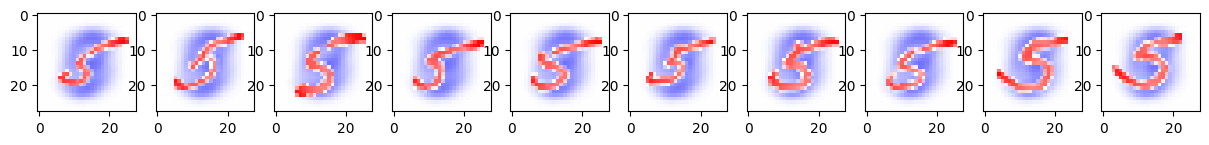

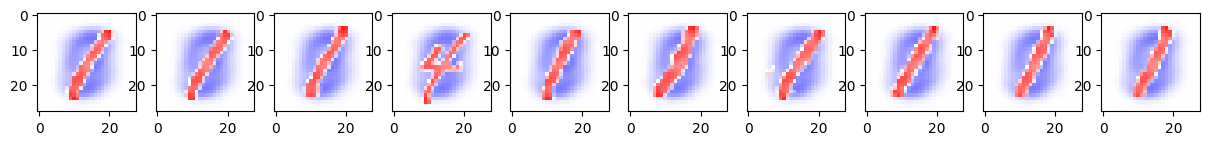

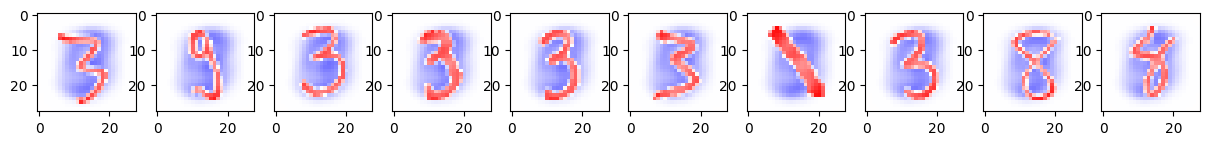

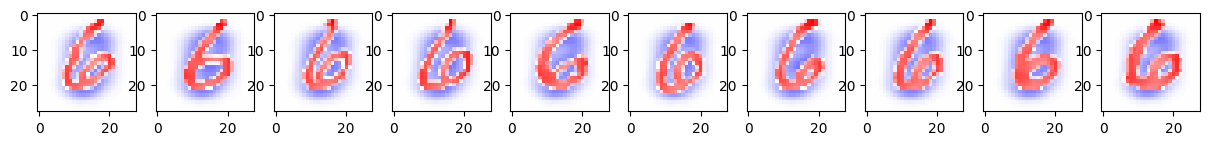

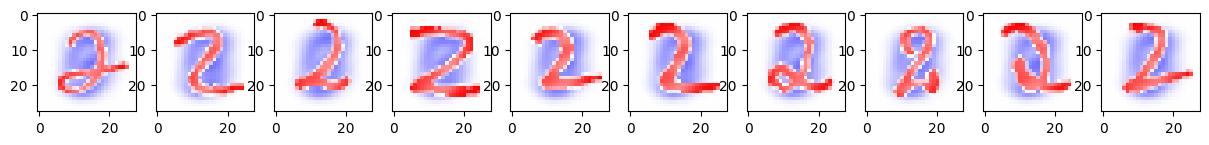

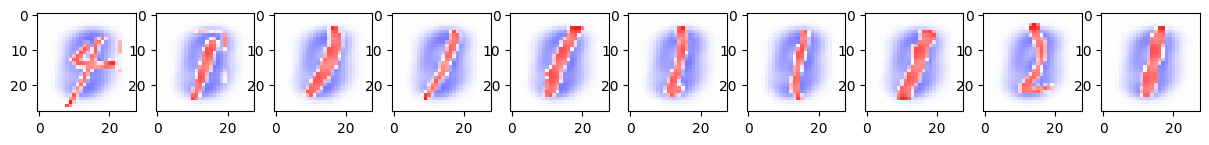

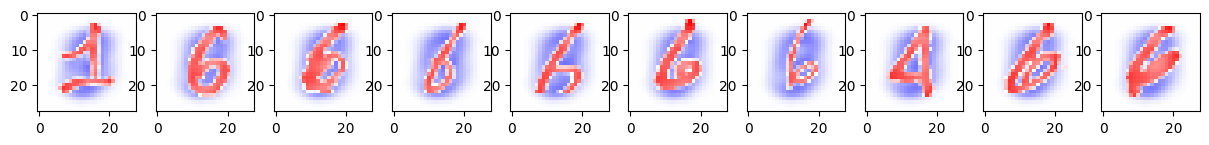

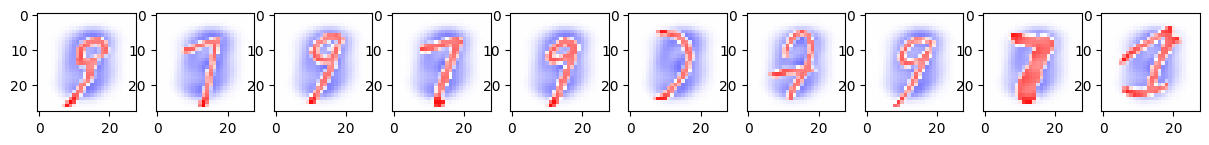

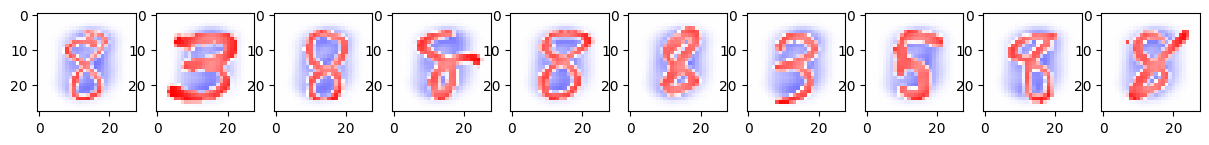

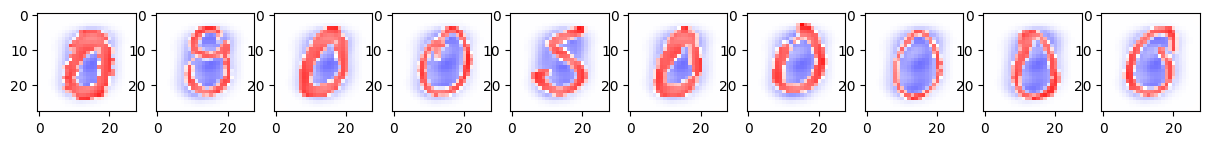

In [27]:
for c in np.unique(clusters):
  indices = np.where(clusters == c)[0]
  if len(indices) > 10:
    plt.figure(figsize=(15,4))
    plt.title("Cluster " + str(c))
    for i in range(10):
      plt.subplot(1,10,i+1)
      plt.imshow(x_train[indices][i], cmap="bwr", vmin=-1, vmax=1)
    plt.show()

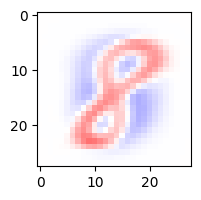

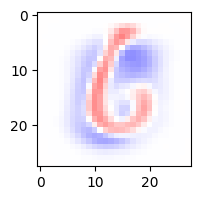

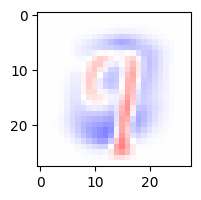

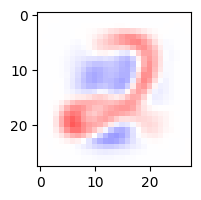

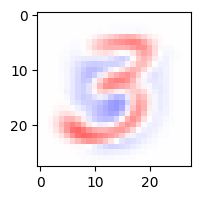

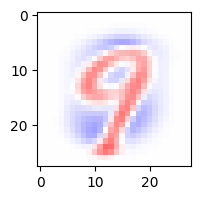

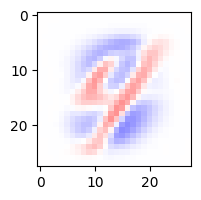

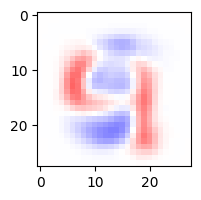

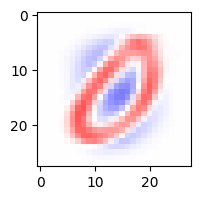

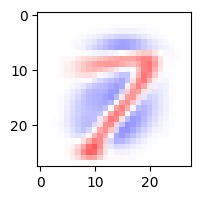

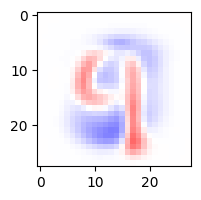

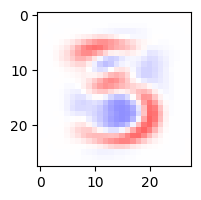

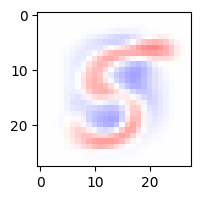

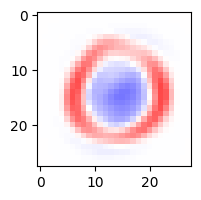

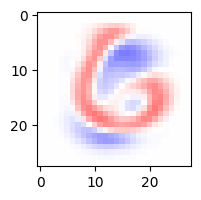

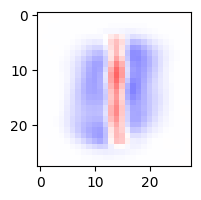

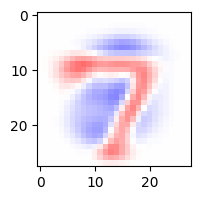

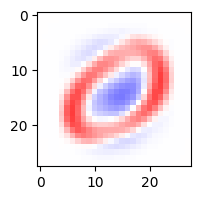

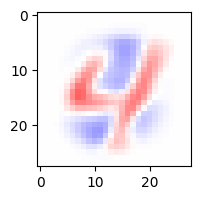

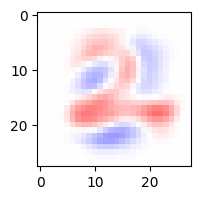

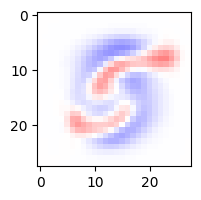

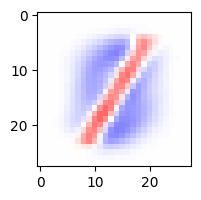

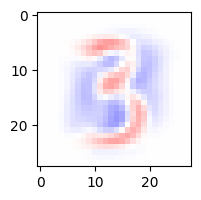

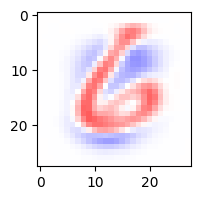

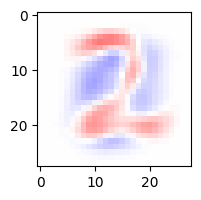

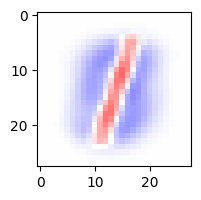

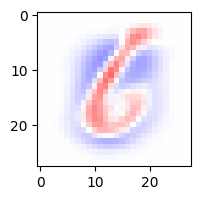

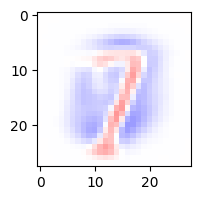

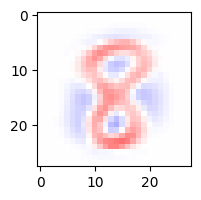

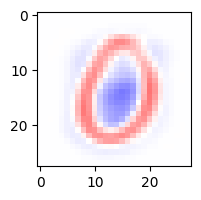

In [28]:
for center in kmeans.cluster_centers_:
  plt.figure(figsize=(2,2))
  plt.imshow(center.reshape(28,28), cmap="bwr", vmin=-1, vmax=1)
  plt.show()

# K-Means para Breast Cancer

In [29]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [30]:
breastCancer = load_breast_cancer()
print(breastCancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [31]:
datos = pd.DataFrame(breastCancer.data, columns=breastCancer.feature_names)
datos

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Preprocesado

In [32]:
medias = datos.mean()
stds = datos.std()
datos = (datos - medias) / stds
datos

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


## Ejecución

In [33]:
K = 10

kmeans = KMeans(n_clusters = K, init = 'random', n_init = 10).fit(datos)
clusters = kmeans.predict(datos)
clusters

array([8, 2, 8, 4, 2, 4, 2, 0, 4, 4, 5, 0, 3, 5, 4, 4, 5, 0, 2, 6, 6, 7,
       4, 2, 2, 8, 4, 2, 0, 2, 8, 4, 0, 2, 0, 0, 0, 9, 5, 0, 5, 0, 3, 0,
       6, 8, 7, 0, 6, 5, 9, 9, 9, 2, 5, 7, 2, 0, 9, 7, 7, 7, 4, 7, 0, 0,
       7, 9, 1, 9, 2, 1, 4, 6, 9, 2, 7, 8, 3, 6, 7, 0, 8, 2, 6, 2, 5, 2,
       5, 0, 5, 5, 9, 6, 0, 2, 7, 7, 6, 0, 5, 7, 5, 7, 7, 4, 7, 9, 3, 6,
       7, 7, 1, 7, 7, 6, 1, 0, 4, 2, 6, 2, 3, 6, 9, 9, 5, 2, 0, 2, 6, 0,
       0, 6, 2, 5, 5, 9, 2, 7, 9, 2, 7, 6, 9, 7, 4, 5, 6, 9, 7, 1, 1, 9,
       6, 6, 2, 5, 9, 9, 7, 2, 8, 7, 2, 9, 9, 2, 2, 9, 6, 5, 0, 7, 9, 9,
       1, 0, 9, 9, 8, 8, 0, 9, 6, 7, 2, 6, 7, 9, 4, 5, 5, 0, 0, 9, 0, 2,
       2, 0, 6, 2, 8, 4, 6, 6, 7, 2, 0, 9, 2, 9, 3, 1, 0, 0, 7, 5, 2, 2,
       6, 6, 7, 0, 9, 6, 6, 6, 5, 4, 0, 5, 5, 2, 7, 5, 8, 2, 5, 2, 6, 9,
       4, 5, 2, 7, 9, 0, 5, 6, 8, 9, 8, 2, 2, 0, 8, 4, 3, 0, 2, 5, 2, 5,
       2, 8, 7, 5, 6, 7, 9, 6, 8, 7, 5, 7, 9, 2, 9, 6, 2, 9, 2, 0, 5, 9,
       5, 9, 1, 5, 1, 6, 6, 6, 9, 9, 9, 5, 9, 7, 8,

In [34]:
centroides = pd.DataFrame(kmeans.cluster_centers_, columns=datos.columns)
centroides

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.156103,0.252476,0.198112,0.044092,0.679579,0.697316,0.579559,0.571176,0.461749,0.359516,...,0.244693,0.472796,0.304163,0.108866,0.885433,0.924415,0.830176,0.828067,0.748649,0.799671
1,-0.944699,-0.178654,-0.855346,-0.784038,-0.072678,0.897799,1.045741,-0.024735,0.591868,2.261023,...,-0.937130,-0.503107,-0.871548,-0.770994,-0.186351,0.369216,0.816205,-0.139134,-0.328130,1.250421
2,1.358836,0.506251,1.315010,1.325507,0.024939,0.293143,0.635224,0.949116,0.041890,-0.729594,...,1.359583,0.490952,1.291083,1.298516,0.135025,0.212897,0.484204,0.898755,0.083057,-0.274922
3,2.238606,0.786811,2.434504,2.584575,1.392974,2.842050,3.036581,2.673956,2.067832,0.923273,...,1.983309,0.465572,2.278140,2.189605,0.401574,1.537691,1.702398,1.795064,0.994657,0.301567
4,-0.095102,0.393269,0.023452,-0.165308,1.555211,1.819281,1.346855,0.906695,1.444813,1.791139,...,0.053962,0.729833,0.180726,-0.050814,1.692278,2.298105,1.906051,1.304016,1.722715,2.468394
5,-0.296310,0.887213,-0.324943,-0.328091,-0.772561,-0.616688,-0.522574,-0.570798,-0.546660,-0.495008,...,-0.345854,0.840328,-0.366332,-0.368323,-0.744325,-0.518445,-0.467965,-0.533804,-0.483028,-0.529110
6,-0.308074,-0.719827,-0.318175,-0.361894,0.028429,-0.261581,-0.457653,-0.410067,-0.157665,-0.071084,...,-0.360464,-0.699754,-0.361355,-0.403922,0.054297,-0.167161,-0.250083,-0.234741,0.072340,-0.057471
7,-1.006492,-0.387684,-0.991002,-0.876157,0.555848,-0.359984,-0.638792,-0.638702,0.255453,0.617944,...,-0.961377,-0.430071,-0.955159,-0.815203,0.359774,-0.576934,-0.750014,-0.783652,-0.227197,-0.106843
8,1.927086,0.716988,1.979752,2.045141,0.775290,1.673239,1.893711,2.156460,0.803893,0.246652,...,2.107255,0.545550,2.144779,2.231319,0.554591,1.297700,1.420581,1.810753,0.630623,0.695902
9,-0.460567,-0.710151,-0.507870,-0.468020,-0.994869,-0.993893,-0.850200,-0.860241,-0.804950,-0.636933,...,-0.533141,-0.722521,-0.580844,-0.517381,-0.957030,-0.876326,-0.886250,-0.961283,-0.675958,-0.777111


## Reducción de dimensionalidad para visualización

Recordad que PCA es una herramienta muy útil para reducir la dimensionalidad de vuestro problema. Además, se puede utilizar para intentar **proyectar un espacio N-dimensional a 2 dimensiones**. Vamos a utilizarlo.

In [35]:
from sklearn.decomposition import PCA

Aunque nos va a dar igual, porque nuestro objetivo es proyectar a 2 dimensiones, conviene analizar la varianza explicada. Para ello calculamos un primer PCA con el número de componentes igual al número de atributos.

In [36]:
pca = PCA(n_components=datos.shape[1])
pca.fit(datos)

PCA(n_components=30)

Como se ve en la siguiente figura, PCA tiene una varianza explicada de aproximadamente un 65% con 2 componentes. **No es un buen resultado** pero queremos visualizar nuestros datos.

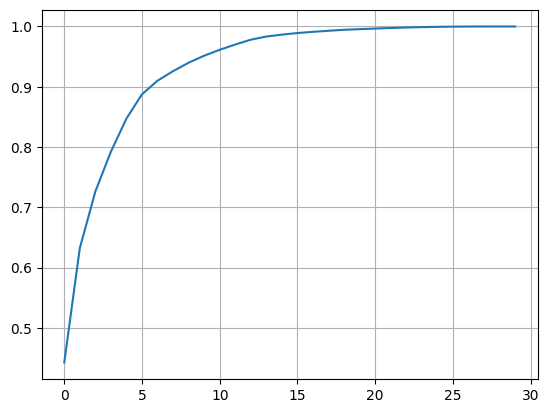

In [37]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.grid()
plt.show()

Ahora sí, calculamos PCA para 2 componentes y lo pintamos.

In [38]:
pca = PCA(n_components=2)
pca.fit(datos)
datos_2d = pca.transform(datos)

Esta primera figura **No nos da mucha información**, no se ve a priori ningún grupo diferenciado en el dataset.

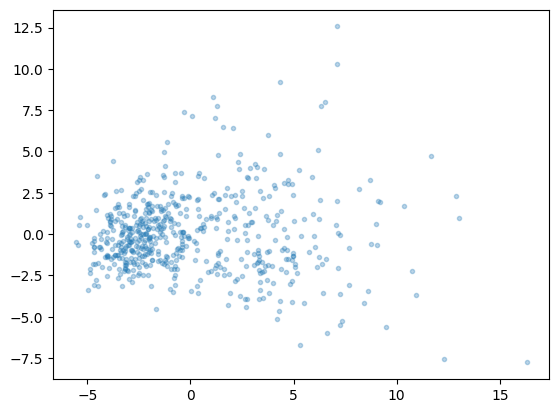

In [39]:
plt.plot(datos_2d[:, 0], datos_2d[:, 1], '.', alpha=0.3)
plt.show()

Sin embargo, si incorporamos la información que nos proporciona K-Means, es decir, a qué cluster pertenece cada punto, podemos visualizar un poco mejor los datos.

- Hay grupos bien diferenciados (se ven claramente grupos de distinto color).

- Hay grupos que PCA no ha sido capaz de diferenciar, los agrupa todos en el mismo sitio pero K-Means es capaz de identificarlos.

- Hay grupos que en PCA están dispersados pero que K-Means los está reconociendo como cercanos.

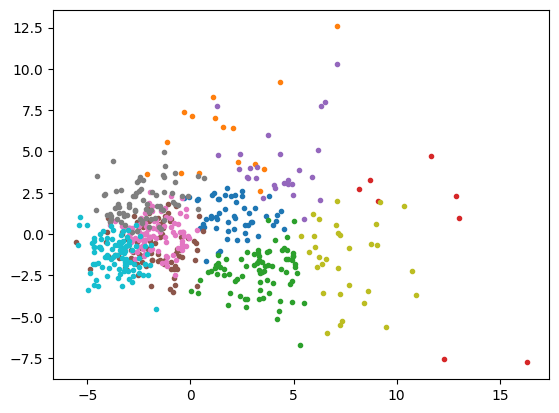

In [40]:
for c in np.unique(clusters):
  plt.plot(datos_2d[clusters==c, 0], datos_2d[clusters==c, 1], '.')
plt.show()